In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_csv('../../datasets/kc_house_data.csv')
house_data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
house_data.drop(['id', 'lat', 'long', 'zipcode'], inplace=True, axis=1)
house_data.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   
3  20141209T000000  604000.0         4       3.00         1960      5000   
4  20150218T000000  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     2.0           0     0          3      7        2170            400   
2     1.0           0     0          3      6         770              0   
3     1.0           0     0          5      7        1050            910   
4     1.0           0     0          3      8        1680              0   

   yr_built  yr_renovated  sqft_living15  sqft_lot15  
0      1955             0           1340        5650  
1      1951          1991           1690        7639  
2      1933             0           2720        8062  
3      1965             0           1360        5000  
4      1987             0           1800        7503

In [5]:
house_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [6]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['house_age'] = house_data['date'].dt.year - house_data['yr_built']

house_data.drop('date', inplace=True, axis=1)
house_data = house_data.drop('yr_built', axis=1)

In [7]:
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x:0 if x == 0 else 1)
house_data.drop('yr_renovated', inplace=True, axis=1)

In [8]:
house_data[['renovated', 'house_age']].sample(10)

renovated  house_age
7769           0          9
2342           0         11
19562          0         77
19951          0         39
11039          0         44
16435          0         29
6843           0         50
12475          0         29
13614          0         15
12641          0         14

In [9]:
house_data.to_csv('../../datasets/house_data_pro.csv', index=False)

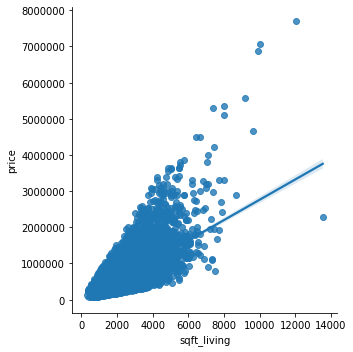

In [10]:
sns.lmplot('sqft_living', 'price', house_data)

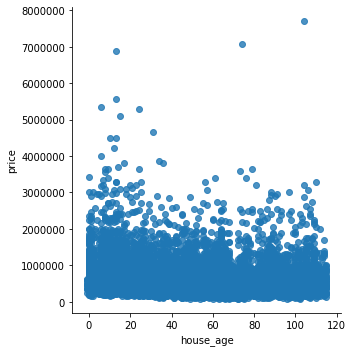

In [11]:
sns.lmplot('house_age', 'price', house_data)

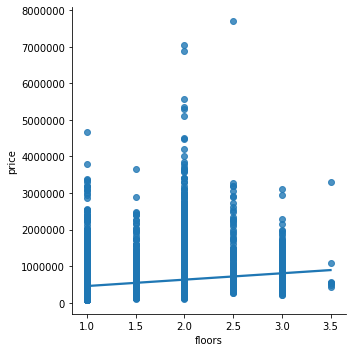

In [12]:
sns.lmplot('floors', 'price', house_data)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [14]:
X = house_data[['sqft_living']]
Y = house_data['price']

In [15]:
X.head()

sqft_living
0         1180
1         2570
2          770
3         1960
4         1680

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [20]:
df = pd.DataFrame({'test' : Y_test, 'predicted' : Y_pred})
df.sample(10)

test     predicted
4299    248000.0  5.719206e+05
15761   315000.0  2.960212e+05
786     500000.0  3.157283e+05
2436    360000.0  4.536780e+05
13662   831500.0  1.213809e+06
5059   1525000.0  1.641735e+06
4680   1130000.0  6.225960e+05
13274   605000.0  4.677545e+05
19715   522500.0  3.579578e+05
20168  1750000.0  1.037853e+06

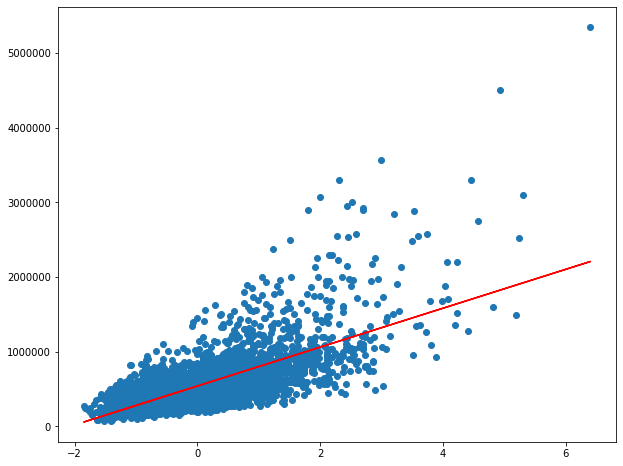

In [21]:
plt.figure(figsize=(10,8))

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, c='r')

plt.show()

In [22]:
print('Training score : ', linear_regression.score(X_train, Y_train))

Training score :  0.49421865546386423


In [23]:
from sklearn.metrics import r2_score

score = r2_score(Y_test, Y_pred)

print('Testing score : ', score)

Testing score :  0.4867387792554724


In [24]:
theta_0 = linear_regression.coef_
theta_0

array([260273.49094422])

In [25]:
intercept = linear_regression.intercept_
intercept

541191.1256217466

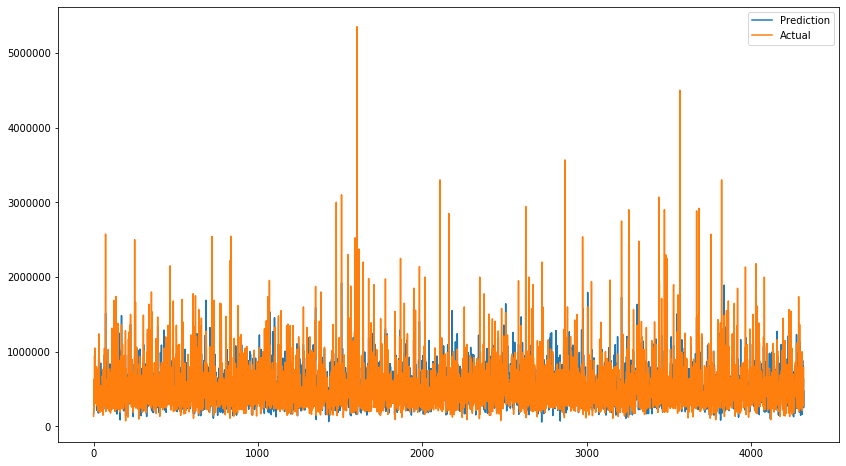

In [27]:
plt.subplots(figsize=(14,8))

plt.plot(Y_pred, label='Prediction')
plt.plot(Y_test.values, label='Actual')

plt.legend()
plt.show()

In [28]:
import statsmodels.api as sm

In [29]:
X_train[:5]

array([[ 0.17214964],
       [-0.3903188 ],
       [ 6.24031875],
       [-0.29296849],
       [-0.03336768]])

In [30]:
X_train = sm.add_constant(X_train)
X_train[:5]

array([[ 1.        ,  0.17214964],
       [ 1.        , -0.3903188 ],
       [ 1.        ,  6.24031875],
       [ 1.        , -0.29296849],
       [ 1.        , -0.03336768]])

In [31]:
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.689e+04
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:20:09   Log-Likelihood:            -2.4033e+05
No. Observations:               17290   AIC:                         4.807e+05
Df Residuals:                   17288   BIC:                         4.807e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.412e+05   2002.532    270.253      0.0

In [32]:
theta_0, intercept

(array([260273.49094422]), 541191.1256217466)